In [7]:
%store -r X_train X_test y_train y_test

In [8]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = classifier.predict(X_test)
print(y_pred)

['B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B']


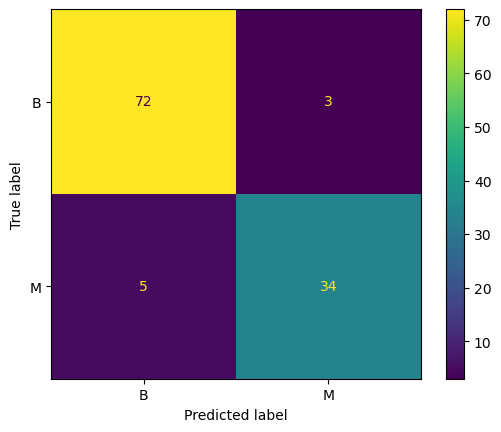

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
display = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
display.plot()

In [11]:
accuracy_score(y_test, y_pred)*100

92.98245614035088

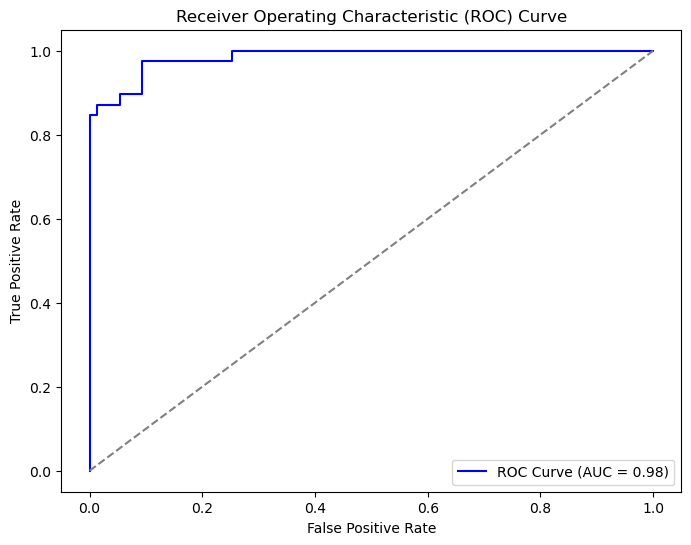

In [12]:
import matplotlib.pyplot as plt
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="M")
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
